<a href="https://colab.research.google.com/github/badriadhikari/2019-Spring-DL/blob/master/course_content/module4_dl_best_practices/MNIST_with_Callbacks_almost_100percent_acc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Early Stopping, Model Checkpointing & Reduce LR on Plateau - MNIST Digit Classification with Callbacks

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step

Dataset dimensions..
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)

A sample..


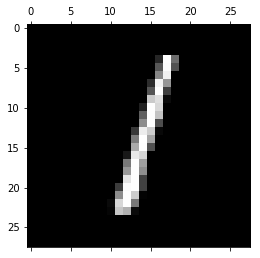

1

Preprocess..

Convert labels to categorical..
(60000, 10)
(10000, 10)

Build model..
Instructions for updating:
Colocations handled automatically by placer.


In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import *
from keras.models import *
import matplotlib.pyplot as plt

( train_images, train_labels ), ( valid_images, valid_labels ) = mnist.load_data()

print('')
print('Dataset dimensions..')
print(train_images.shape)
print(train_labels.shape)
print(valid_images.shape)
print(valid_labels.shape)

print('')
print('A sample..')
plt.matshow( valid_images[2], cmap = 'gray')
plt.show()
print(valid_labels[2])

print('')
print('Preprocess..')
train_images = train_images.reshape( ( 60000, 28, 28, 1 ) )
train_images = train_images.astype( 'float32' ) / 255
valid_images = valid_images.reshape( ( 10000, 28, 28, 1 ) )
valid_images = valid_images.astype( 'float32' ) / 255

print('')
print('Convert labels to categorical..')
train_labels = to_categorical( train_labels )
valid_labels = to_categorical( valid_labels )

print( train_labels.shape )
print( valid_labels.shape )

print('')
print('Build model..')
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 5, activation = 'relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 16, kernel_size = 5, activation = 'relu'))
model.add(Conv2D(filters = 16, kernel_size = 5, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Flatten())
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

In [2]:
import keras

a = keras.callbacks.ModelCheckpoint( filepath='my_model.h5', monitor='val_acc', verbose = 1, save_best_only=True )
b = keras.callbacks.EarlyStopping( monitor = 'val_acc', patience = 40, verbose = 1 )
c = keras.callbacks.ReduceLROnPlateau( monitor = 'val_loss', factor = 0.1, patience = 20, verbose = 1 )

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Observe by setting verbose = 1
history = model.fit(train_images, train_labels, epochs=128, batch_size=10, callbacks = [a, b, c], verbose = 1, validation_data = (valid_images, valid_labels))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/128
60000/60000 [==============================] - 38s 634us/step - loss: 0.0249 - acc: 0.9917 - val_loss: 0.0104 - val_acc: 0.9965

Epoch 00001: val_acc improved from -inf to 0.99646, saving model to my_model.h5
Epoch 2/128
60000/60000 [==============================] - 31s 510us/step - loss: 0.0107 - acc: 0.9965 - val_loss: 0.0079 - val_acc: 0.9972

Epoch 00002: val_acc improved from 0.99646 to 0.99723, saving model to my_model.h5
Epoch 3/128
60000/60000 [==============================] - 32s 527us/step - loss: 0.0083 - acc: 0.9974 - val_loss: 0.0088 - val_acc: 0.9972

Epoch 00003: val_acc did not improve from 0.99723
Epoch 4/128
60000/60000 [==============================] - 30s 501us/step - loss: 0.0069 - acc: 0.9978 - val_loss: 0.0087 - val_acc: 0.9970

Epoch 00004: val_acc did not improve from 0.99723
Epoch 5/128
60000/60000 [==============================] - 31s 512us/step -

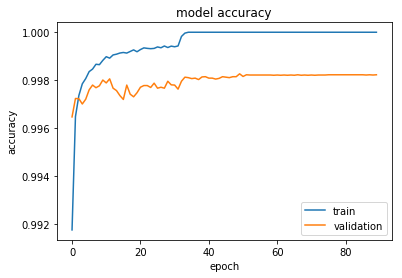

In [3]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [4]:
scores = model.evaluate(valid_images, valid_labels)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

10000/10000 [==============================] - 1s 60us/step

acc: 99.82%


In [0]:
from keras.models import load_model
model = load_model('my_model.h5')

In [6]:
scores = model.evaluate(valid_images, valid_labels)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

10000/10000 [==============================] - 1s 65us/step

acc: 99.83%


In [0]:
from google.colab import files
files.download("my_model.h5")